Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Interpolation vs Curve Fitting

### Interpolation
- Construct a curve that passes through all the data points
- Implicit assumption that all points are accurate and distinct

### Curve Fitting
- Find a smooth curve that approximates the data
- Applied to data that is scattered (contains noise or measurements aren't perfect)
- The curve does not necessarily hit all the data points


Given the following data points, use the monomials and Lagrange polynomials to interpolate the data

|    `x` |   0 |   1 |  -1 |   2 |  -2 |
|    --- | --- | --- | --- | --- | --- |
| `f(x)` |  -5 |  -3 | -15 |  39 |  -9 |

In [2]:
data = np.array([[ 0,  1,  -1,  2, -2],
                 [-5, -3, -15, 39, -9]], dtype=float)

# Monomial Interpolation

Define the monomial functions

$$\begin{align}
    p_{0}(x) &= 1 \nonumber \\
    p_{1}(x) &= x \nonumber \\
    p_{2}(x) &= x^{2} \nonumber \\
    &\vdots  \nonumber \\
    p_{n}(x) &= x^{n} \nonumber \\
\end{align}$$

In [3]:
def monomialPoly(data):
    n = data.shape[1]

    M = []
    for i in range(n):
        def poly(x,i=i):
            return x**i
        M.append(poly)
    return M

def interpMonomial(x,data):
    n = data.shape[1]

    M = monomialPoly(data)

    V = np.zeros([n,n])
    f = np.zeros([n,1])
    for i in range(n):
        P = []
        for j in range(n):
            P.append(M[j](data[0,i]))
        V[i,:] = P
        f[i] = data[1,i]

    c = np.linalg.solve(V,f)

    sum = 0
    for i in range(n):
        sum += c[i]*x**i
    
    return sum

Plot the interpolated curve passing through the data points

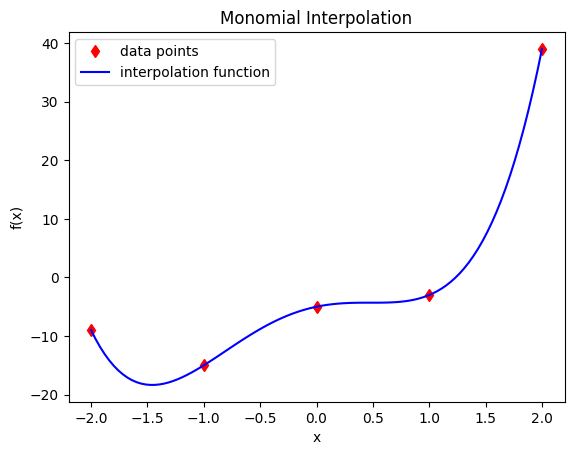

In [4]:
x = np.linspace(-2,2,100)

plt.plot(data[0,0],data[1,0],'rd',label='data points')
for i in range(1,data.shape[1]):
    plt.plot(data[0,i],data[1,i],'rd')
plt.plot(x,interpMonomial(x,data),'b-',label='interpolation function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Monomial Interpolation')
plt.legend()
plt.show()

Plot the monomial basis

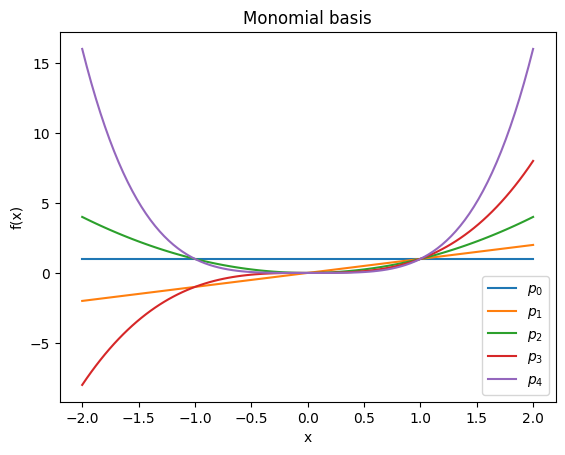

In [5]:
M = monomialPoly(data)
for i in range(data.shape[1]):
    plt.plot(x,M[i](x),label=fr'$p_{i}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Monomial basis')
plt.legend()
plt.show()

# Lagrange Interpolation

Define the Lagrange interpolation function, $L(x)$

$$L(x) = \sum_{i=1}^{n} \ell_{i}(x)~y_{i}, ~~~~~ \ell_{i}(x) = \prod_{\substack{j=1 \\ i\neq j}}^{n} \frac{x-x_{j}}{x_{i} - x_{j}}$$

In [6]:
def lagrangePoly(data):
    n = data.shape[1]
    L = []

    for i in range(n):

        def lagrange(x,i=i):
            prod = 1
            for j in range(n):
                if j != i:
                    prod *= (x - data[0,j]) / (data[0,i] - data[0,j])
            return prod
        
        L.append(lagrange)
    
    return L

def interpLagrange(x,data):
    n = data.shape[1]
    L = lagrangePoly(data)

    sum = 0
    for i in range(n):
        sum += data[1,i] * L[i](x)

    return sum

Plot the interpolated curve passing through the data points

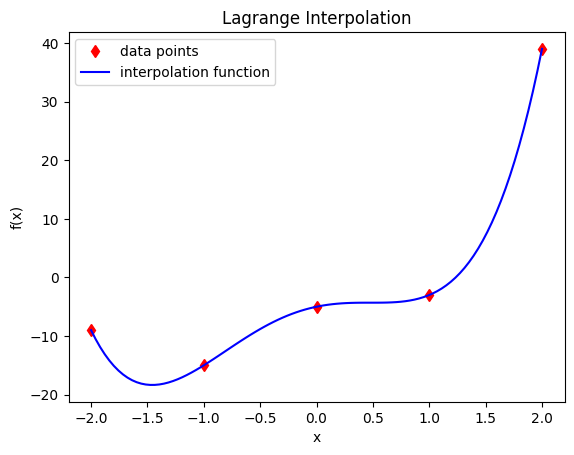

In [7]:
data = np.array([[ 0,  1,  -1,  2, -2],
                 [-5, -3, -15, 39, -9]], dtype=float)

x = np.linspace(-2,2,100)

plt.plot(data[0,0],data[1,0],'rd',label='data points')
for i in range(1,data.shape[1]):
    plt.plot(data[0,i],data[1,i],'rd')
plt.plot(x,interpLagrange(x,data),'b-',label='interpolation function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Lagrange Interpolation')
plt.legend()
plt.show()

Plot the Lagrange basis

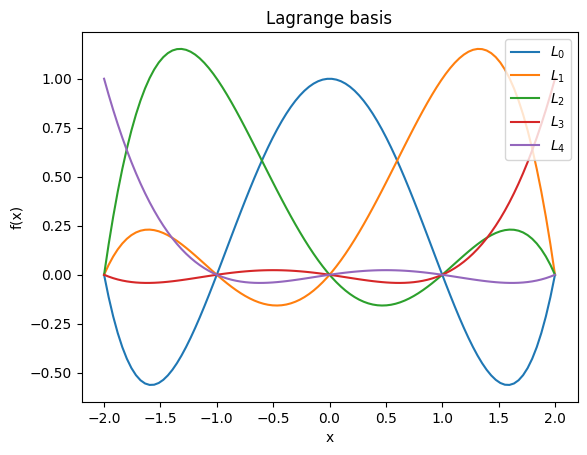

In [8]:
L = lagrangePoly(data)
for i in range(data.shape[1]):
    plt.plot(x,L[i](x),label=fr'$L_{i}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Lagrange basis')
plt.legend()
plt.show()